In [3]:
!ls -lh datasets/inception/

total 104M
-rw-r--r-- 1 dola dola  31K Feb 10 15:44 imagenet_class_names.txt
-rw-r----- 1 dola dola 104M Aug 29 08:21 inception_v3.ckpt


In [4]:
%matplotlib inline

In [21]:
import tensorflow as tf
import numpy as np
from nets.inception_v3 import inception_v3, inception_v3_arg_scope
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt

from skimage import io, transform, util

In [9]:
inception_v3.default_image_size

299

In [149]:
# X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3])
tf.reset_default_graph()
h = w = inception_v3.default_image_size
img = tf.placeholder(tf.float32, shape=[None, None, 3])
resized_img = tf.image.resize_image_with_crop_or_pad(img, h, w)
img_batch = tf.expand_dims(resized_img, axis=0)
# X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3])
X = img_batch
with slim.arg_scope(inception_v3_arg_scope()):
    logits, endpoints = inception_v3(X, num_classes=1001, is_training=False)

In [150]:
with tf.Session() as sess:
    a = img_batch.eval(feed_dict={img: image})

In [151]:
endpoints.keys()

dict_keys(['Mixed_7a', 'MaxPool_5a_3x3', 'Mixed_5b', 'Mixed_6a', 'Mixed_6c', 'PreLogits', 'Mixed_5d', 'MaxPool_3a_3x3', 'Conv2d_4a_3x3', 'AuxLogits', 'Conv2d_2a_3x3', 'Mixed_6b', 'Conv2d_1a_3x3', 'Mixed_6d', 'Logits', 'Mixed_5c', 'Mixed_7b', 'Mixed_6e', 'Conv2d_3b_1x1', 'Predictions', 'Mixed_7c', 'Conv2d_2b_3x3'])

(299, 299, 3)


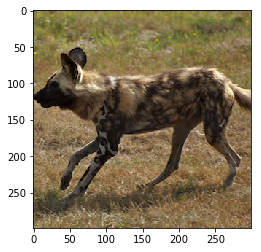

In [152]:
#image_url = "http://media4.s-nbcnews.com/j/newscms/2016_36/1685951/ss-160826-twip-05_8cf6d4cb83758449fd400c7c3d71aa1f.nbcnews-ux-2880-1000.jpg"
image_url = "images/cnn/test_image.png"
image = io.imread(image_url, )
image = util.img_as_float(image)
plt.imshow(image)
print(image.shape)

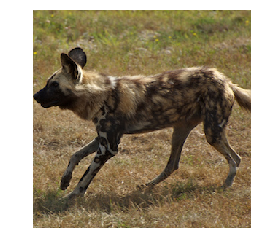

In [153]:
import os
import matplotlib.image as mpimg
test_image = mpimg.imread(os.path.join("images","cnn","test_image.png"))[:, :, :3]
plt.imshow(test_image)
plt.axis("off")
plt.show()

In [154]:
saver = tf.train.Saver()


In [155]:

with tf.Session() as sess:
    saver.restore(sess, "datasets/inception/inception_v3.ckpt")
#     data = img_batch.eval(feed_dict={img: image})
#     print(data.shape)
#     probs = endpoints["Predictions"].eval(feed_dict={X: data})
    probs = endpoints["Predictions"].eval(feed_dict={img: image})

In [156]:
class_names = np.array(open("datasets/inception/imagenet_class_names.txt").readlines())

In [157]:
labels = np.argsort(probs[0])[::-1][:5]


In [158]:
class_names[labels]

array(['n02117135 hyena, hyaena\n', 'n02119022 red fox, Vulpes vulpes\n',
       'n01630670 common newt, Triturus vulgaris\n',
       'n02823428 beer bottle\n', 'n04371774 swing\n'], 
      dtype='<U132')

In [161]:
n = 198
chunks = np.arange(0, 15)
epsilon = 1.05e-5
probs = 1 / ( 1 + np.exp(n * epsilon * 2 **chunks))

In [162]:
probs

array([  4.99480250e-01,   4.98960501e-01,   4.97921012e-01,
         4.95842096e-01,   4.91684767e-01,   4.83374132e-01,
         4.66784988e-01,   4.33861841e-01,   3.69998325e-01,
         2.56460354e-01,   1.06319844e-01,   1.39559925e-02,
         2.00281976e-04,   4.01289411e-08,   1.61033204e-15])